# Glossary

- <a href='#intro'><b>1 Introduction</b></a>
- <a href='#importing'><b>2 Importing and installing dependencies</b></a>
- <a href='#game_data'><b>3 Game Data</b></a>
    - <a href='#null'><b>3.1 Checking for Null values</b></a>
        - <a href='#null_needs'>3.1.1 Checking whether or not we need the columns with missing values</a>
        - <a href='#null_drop'>3.1.2 Dropping unnecessary columns</a>
    - <a href='#types'><b>3.2 Checking column types</b></a>
        - <a href='#memory_usage'> 3.2.1 Changing column types for less memory usage</a>
    - <a href='#scatter_plot'><b>3.3 Plotting the games of the season</b></a>
- <a href='#video_footage_injury'><b>4 Video Footage Injury</b></a>
    - <a href='#video_footage_injury_null'><b>4.1 Checking for Null values</b></a>
    - <a href='#video_footage_injury_types'><b>4.2 Checking column types</b></a>
    - <a href='#video_footage_injury_season'><b>4.3 Plotting concussions by season and year</b></a>
        - <a href='#video_footage_injury_season_season'>4.3.1 Concussions by season and year</a>
        - <a href='#video_footage_injury_season_week'>4.3.2 Concussions by week and quarter</a>
- <a href='#video_review'><b>5 Video Review</b></a>
    - <a href='#video_review_null'><b>5.1 Checking for Null values</b></a>
        - <a href='#video_review_null_needs'>5.1.1 Checking whether or not we need the columns with missing values</a>
    - <a href='#video_review_types'><b>5.2 Checking column types</b></a>
        - <a href='#video_review_usage'> 5.2.1 Changing column types for less memory usage</a>
    - <a href='#video_review_plot'><b>5.3 Plotting concussions by category</b></a>
- <a href='#video_footage_control'><b>6 Video Footage Control</b></a>
    - <a href='#video_footage_control_null'><b>6.1 Checking for Null values</b></a>
    - <a href='#video_footage_control_types'><b>6.2 Checking column types</b></a>
    - <a href='#video_footage_control_types_plot'><b>6.3 Plotting video reviews by quarter</b></a>
- <a href='#play_information'><b>7 Play Information</b></a>
    - <a href='#play_information_null'><b>7.1 Checking for Null values</b></a>
    - <a href='#play_information_types'><b>7.2 Checking column types</b></a>
    - <a href='#play_information_types_plot'><b>7.3 Plotting total amount of plays per week</b></a>
- <a href='#play_player_role_data'><b>8 Play Player Role Data</b></a>
    - <a href='#play_player_role_data_null'><b>8.1 Checking for Null values</b></a>
    - <a href='#play_player_role_data_types'><b>8.2 Checking column types</b></a>
    - <a href='#play_player_role_data_plot'><b>8.3 Plotting amount of players per role</b></a>
- <a href='#player_punt_data'><b>9 Player Punt Data</b></a>
    - <a href='#player_punt_data_null'><b>9.1 Checking for Null values</b></a>
    - <a href='#player_punt_data_types'><b>9.2 Checking column types</b></a>
    - <a href='#player_punt_data_plot'><b>9.3 Plotting amount of players per role</b></a>
- <a href='#player_data'><b>10 Player Data</b></a>

# <a id='intro'><b>1 Introduction:</b></a>

The National Football League is America's most popular sports league, comprised of 32 franchises that compete each year to win the Super Bowl, the world's biggest annual sporting event. Founded in 1920, the NFL developed the model for the successful modern sports league, including national and international distribution, extensive revenue sharing, competitive excellence, and strong franchises across the country.

The NFL is committed to advancing progress in the diagnosis, prevention and treatment of sports-related injuries. The NFL's ongoing health and safety efforts include support for independent medical research and engineering advancements and a commitment to look at anything and everything to protect players and make the game safer, including enhancements to medical protocols and improvements to how our game is taught and played.

As more is learned, the league evaluates and changes rules to evolve the game and try to improve protections for players. Since 2002 alone, the NFL has made 50 rules changes intended to eliminate potentially dangerous tactics and reduce the risk of injuries.

For more information about the NFL's health and safety efforts, please visit www.PlaySmartPlaySafe.com.

# <a id='importing'><b>2 Importing and installing dependencies:</b></a>

In [29]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
sns.set()

print('All dependencies installed')

All dependencies installed


# <a id='game_data'><b>3 Game Data:</b></a>

In [30]:
game_data = pd.read_csv('../input/game_data.csv', parse_dates=True)
print(game_data.shape)
game_data.head()

(666, 18)


,GameKey,Season_Year,Season_Type,Week,Game_Date,Game_Day,Game_Site,Start_Time,Home_Team,HomeTeamCode,Visit_Team,VisitTeamCode,Stadium,StadiumType,Turf,GameWeather,Temperature,OutdoorWeather
0,1,2016,Pre,1,2016-08-07 00:00:00.000,Sunday,Indianapolis,20:00,Indianapolis Colts,IND,Green Bay Packers,GB,Tom Benson Hall of Fame Stadium,Outdoor,Turf,NaN,NaN,NaN
1,2,2016,Pre,2,2016-08-13 00:00:00.000,Saturday,Los Angeles,17:00,Los Angeles Rams,LA,Dallas Cowboys,DAL,Los Angeles Memorial Coliseum,Outdoor,Grass,Sunny,79.0,Sunny
2,3,2016,Pre,2,2016-08-11 00:00:00.000,Thursday,Baltimore,19:30,Baltimore Ravens,BLT,Carolina Panthers,CAR,M&T Bank Stadium,Outdoor,Natural Grass,Party Cloudy,94.0,Partly Cloudy
3,4,2016,Pre,2,2016-08-12 00:00:00.000,Friday,Green Bay,19:00,Green Bay Packers,GB,Cleveland Browns,CLV,Lambeau Field,Outdoor,DD GrassMaster,NaN,73.0,NaN
4,5,2016,Pre,2,2016-08-11 00:00:00.000,Thursday,Chicago,19:00,Chicago Bears,CHI,Denver Broncos,DEN,Soldier Field,Outdoor,Grass,"Partly Cloudy, Chance of Rain 80%",88.0,NaN


## <a id='null'><b>3.1 Checking for Null values</b></a>

In [31]:
np.sum(game_data.isnull())

GameKey             0
Season_Year         0
Season_Type         0
Week                0
Game_Date           0
Game_Day            0
Game_Site           0
Start_Time          0
Home_Team           0
HomeTeamCode        0
Visit_Team          0
VisitTeamCode       0
Stadium             0
StadiumType        38
Turf                1
GameWeather        98
Temperature        66
OutdoorWeather    254
dtype: int64

### <a id='null_needs'>3.1.1 Checking whether or not we need the columns with missing values</a>

In [32]:
stadium_type = game_data['StadiumType'].value_counts()
turf = game_data['Turf'].value_counts()
game_weather = game_data['GameWeather'].value_counts()
temperature = game_data['Temperature'].value_counts()
outdoor_weather = game_data['OutdoorWeather'].value_counts

print(stadium_type, '\n', '-'*50, '\n', turf, '\n', '-'*50, '\n', game_weather, '\n', '-'*50, '\n', temperature,  '\n', '-'*50, '\n', outdoor_weather)

Outdoor                         348
Outdoors                         81
Indoors                          46
Indoor                           42
Retractable Roof                 21
Dome                             21
Open                             20
Retr. Roof - Closed               9
outdoor                           4
Retr. Roof-Closed                 4
Retr. Roof - Open                 3
Retr. Roof-Open                   2
Dome, closed                      2
Indoor, non-retractable roof      2
Outdoors                          2
Closed Dome                       2
Indoors (Domed)                   2
Domed, closed                     2
Retr. roof - closed               1
Indoor, fixed roof                1
Indoor, Roof Closed               1
Indoor, Fixed Roof                1
Outside                           1
Ourdoor                           1
Heinz Field                       1
Turf                              1
Retr. Roof Closed                 1
Indoor, Non-Retractable Dome

stadium_type = most of the values are repeated or labelled differently but mean the same. Most stadiums also are outdoors with a few with retractable roofs. The few that are missing can be searched easily. 
turf = same with stadium_type, most values are the same but labelled differently and can be searched easily. 
game_weather = around 15% of the values are missing in this column. This can be searched but will be more time-consuming. 
temperature = around 10% of the values are missing in this column, which seems a little weird since game_weather has more missing values. 
outdoor_weather = around 38% of the data is missing and may potentially not have a very big impact on the analysis of data.

<a id='null_drop'>3.1.2 Dropping unnecessary columns</a>

In [33]:
game_data = game_data.drop(columns=['OutdoorWeather', 'GameWeather'], axis=1)
game_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666 entries, 0 to 665
Data columns (total 16 columns):
GameKey          666 non-null int64
Season_Year      666 non-null int64
Season_Type      666 non-null object
Week             666 non-null int64
Game_Date        666 non-null object
Game_Day         666 non-null object
Game_Site        666 non-null object
Start_Time       666 non-null object
Home_Team        666 non-null object
HomeTeamCode     666 non-null object
Visit_Team       666 non-null object
VisitTeamCode    666 non-null object
Stadium          666 non-null object
StadiumType      628 non-null object
Turf             665 non-null object
Temperature      600 non-null float64
dtypes: float64(1), int64(3), object(12)
memory usage: 83.3+ KB


After dropping 2 columns and changing their types, the memory usage went down by 21+ KB

## <a id='types'><b>3.2 Checking column types</b></a>

In [34]:
game_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666 entries, 0 to 665
Data columns (total 16 columns):
GameKey          666 non-null int64
Season_Year      666 non-null int64
Season_Type      666 non-null object
Week             666 non-null int64
Game_Date        666 non-null object
Game_Day         666 non-null object
Game_Site        666 non-null object
Start_Time       666 non-null object
Home_Team        666 non-null object
HomeTeamCode     666 non-null object
Visit_Team       666 non-null object
VisitTeamCode    666 non-null object
Stadium          666 non-null object
StadiumType      628 non-null object
Turf             665 non-null object
Temperature      600 non-null float64
dtypes: float64(1), int64(3), object(12)
memory usage: 83.3+ KB


### <a id='memory_usage'> 3.2.1 Changing column types for less memory usage</a>

In [35]:
category_columns = ['Season_Type', 'StadiumType', 'Turf']
float_columns = ['Temperature']

game_data[category_columns] = game_data[category_columns].astype('category')
game_data[float_columns] = game_data[float_columns].astype(float)
date = pd.to_datetime(game_data['Game_Date'].str.split(expand=True)[0], format='%Y-%m-%d')

game_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666 entries, 0 to 665
Data columns (total 16 columns):
GameKey          666 non-null int64
Season_Year      666 non-null int64
Season_Type      666 non-null category
Week             666 non-null int64
Game_Date        666 non-null object
Game_Day         666 non-null object
Game_Site        666 non-null object
Start_Time       666 non-null object
Home_Team        666 non-null object
HomeTeamCode     666 non-null object
Visit_Team       666 non-null object
VisitTeamCode    666 non-null object
Stadium          666 non-null object
StadiumType      628 non-null category
Turf             665 non-null category
Temperature      600 non-null float64
dtypes: category(3), float64(1), int64(3), object(9)
memory usage: 72.1+ KB


## <a id='scatter_plot'><b>3.3 Plotting the games of the season</b></a>

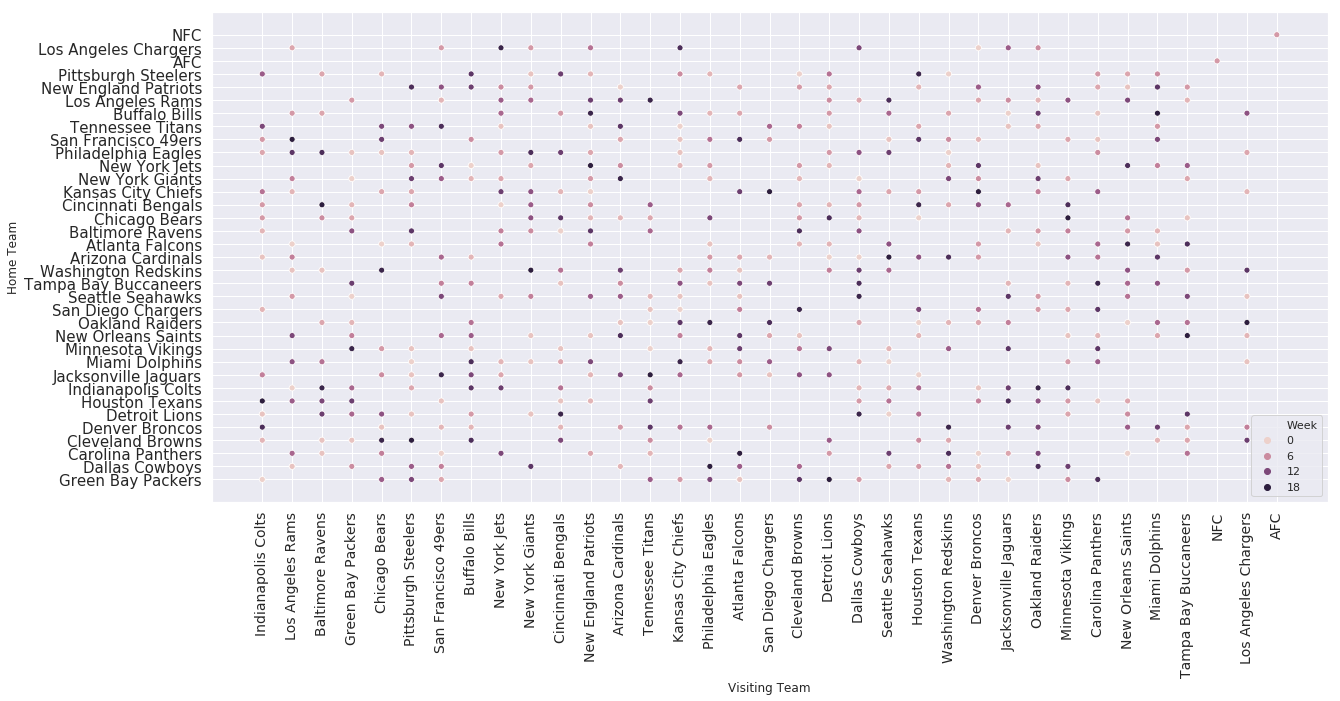

In [36]:
plt.figure(figsize=(20, 9))

_ = sns.scatterplot(x='Home_Team', y='Visit_Team', hue='Week',data=game_data)
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=15)
plt.xlabel('Visiting Team')
plt.ylabel('Home Team')

plt.show()

It seems that the dataset included for NFC and AFC which are divisions and not teams.

# <a id='video_footage_injury'><b>4 Video Footage Injury:</b></a>

In [37]:
video_footage_injury = pd.read_csv('../input/video_footage-injury.csv', parse_dates=True)
print(game_data.shape)
video_footage_injury.head()

(666, 16)


,season,Type,Week,Home_team,Visit_Team,Qtr,PlayDescription,gamekey,playid,PREVIEW LINK (5000K)
0,2016,Pre,2,Chicago Bears,Denver Broncos,3,(3:44) (Punt formation) P.O'Donnell punts 58 y...,5,3129,http://a.video.nfl.com//films/vodzilla/153233/...
1,2016,Pre,3,Tennessee Titans,Carolina Panthers,3,(5:52) (Punt formation) K.Redfern punts 36 yar...,21,2587,http://a.video.nfl.com//films/vodzilla/153234/...
2,2016,Pre,3,Washington Redskins,New York Jets,1,"(4:46) L.Edwards punts 51 yards to WAS 27, Cen...",29,538,http://a.video.nfl.com//films/vodzilla/153235/...
3,2016,Pre,4,New York Jets,New York Giants,2,"(8:29) B.Wing punts 44 yards to NYJ 10, Center...",45,1212,http://a.video.nfl.com//films/vodzilla/153236/...
4,2016,Pre,5,Detroit Lions,Buffalo Bills,1,"(:38) C.Schmidt punts 46 yards to DET 8, Cente...",60,905,http://a.video.nfl.com//films/vodzilla/153237/...


## <a id='video_footage_injury_null'><b>4.1 Checking for Null values</b></a>

In [38]:
np.sum(video_footage_injury.isnull())

season                  0
Type                    0
Week                    0
Home_team               0
Visit_Team              0
Qtr                     0
PlayDescription         0
gamekey                 0
playid                  0
PREVIEW LINK (5000K)    0
dtype: int64

## <a id='video_footage_injury_types'><b>4.2 Checking column types</b></a>

In [39]:
video_footage_injury.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 10 columns):
season                  37 non-null int64
Type                    37 non-null object
Week                    37 non-null int64
Home_team               37 non-null object
Visit_Team              37 non-null object
Qtr                     37 non-null int64
PlayDescription         37 non-null object
gamekey                 37 non-null int64
playid                  37 non-null int64
PREVIEW LINK (5000K)    37 non-null object
dtypes: int64(5), object(5)
memory usage: 3.0+ KB


## <a id='video_footage_injury_season'><b>4.3 Plotting concussions by season and year</b></a>
### <a id='video_footage_injury_season_season'>4.3.1 Concussions by season and year</a>

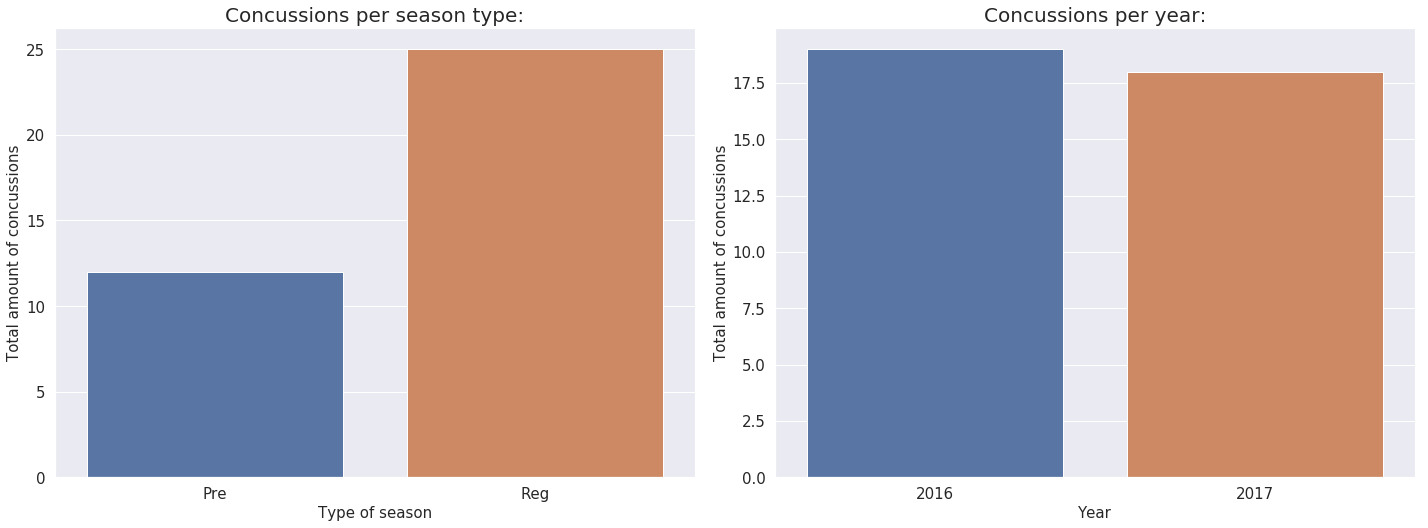

In [40]:
plt.figure(figsize=(20, 7.5))

plt.subplot(1, 2, 1)
_ = sns.countplot(video_footage_injury['Type'])
plt.title('Concussions per season type:', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Type of season', fontsize=15)
plt.ylabel('Total amount of concussions', fontsize=15)

plt.subplot(1, 2, 2)
_ = sns.countplot(video_footage_injury['season'])
plt.title('Concussions per year:', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Total amount of concussions', fontsize=15)

plt.tight_layout()
plt.show()

Clearly, more of the concussions occur during regular season rather than the pre-season and 2016 is showing a slight increase in concussions.

### <a id='video_footage_injury_season_week'>4.3.2 Concussions by week and quarter</a>

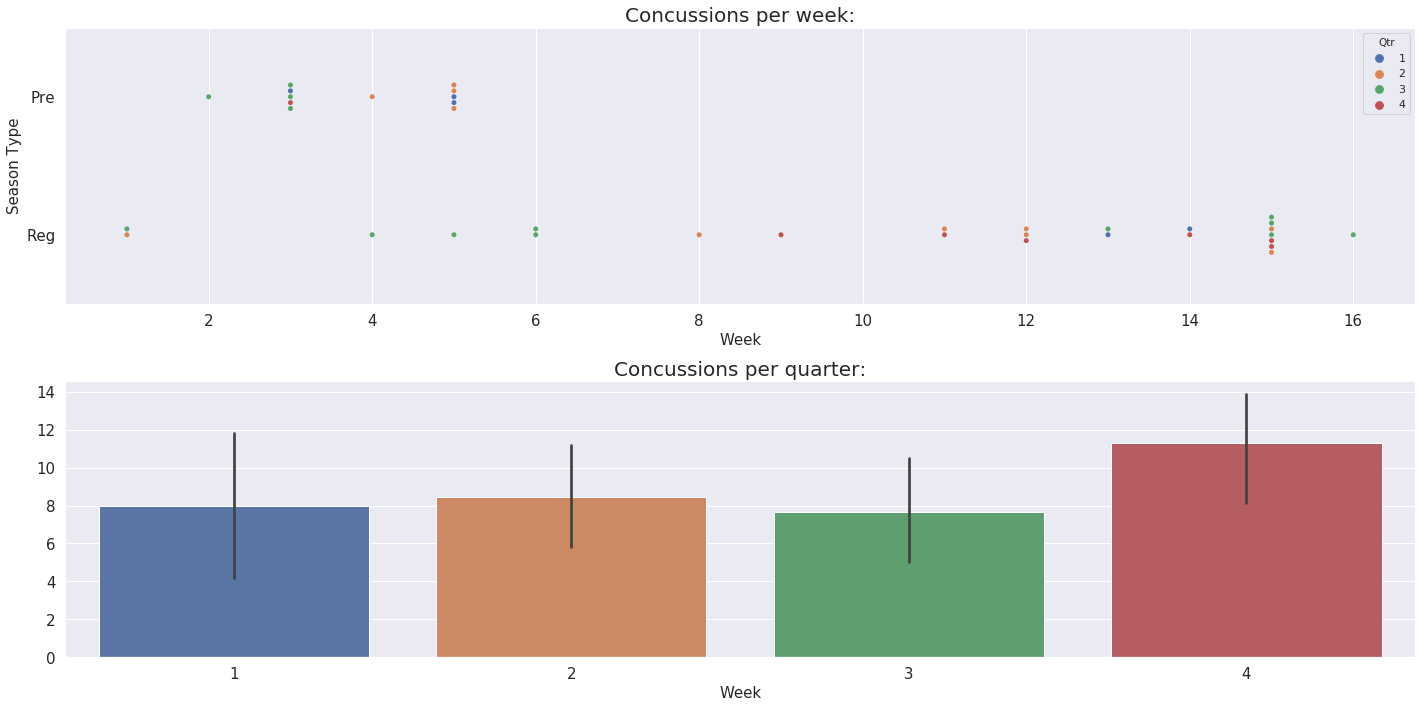

In [41]:
plt.figure(figsize=(20, 10))

plt.subplot(2, 1, 1)
_ = sns.swarmplot(x='Week', y='Type', hue='Qtr', data=video_footage_injury)
plt.title('Concussions per week:', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Week', fontsize=15)
plt.ylabel('Season Type', fontsize=15)

plt.subplot(2, 1, 2)
_ = sns.barplot(x='Qtr', y='Week', data=video_footage_injury)
plt.title('Concussions per quarter:', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Week', fontsize=15)
plt.ylabel('')

plt.tight_layout()
plt.show()

It seems that as the season gets in its final stages, concussions are more prevalent. This can be correlated to teams trying to make it to the playoffs rather than getting eliminated. Also, most concussions occur during the 4th quarter followed by the 2nd quarter. The 1st, 2nd, and 3rd quarters show almost an identical distribution.

# <a id='video_review'><b>5 Video Review:</b></a>

In [42]:
video_review = pd.read_csv('../input/video_review.csv')
print(video_review.shape)
video_review.head()

(37, 10)


,Season_Year,GameKey,PlayID,GSISID,Player_Activity_Derived,Turnover_Related,Primary_Impact_Type,Primary_Partner_GSISID,Primary_Partner_Activity_Derived,Friendly_Fire
0,2016,5,3129,31057,Tackling,No,Helmet-to-body,32482,Tackled,No
1,2016,21,2587,29343,Blocked,No,Helmet-to-helmet,31059,Blocking,No
2,2016,29,538,31023,Tackling,No,Helmet-to-body,31941,Tackled,No
3,2016,45,1212,33121,Tackling,No,Helmet-to-body,28249,Tackled,No
4,2016,54,1045,32444,Blocked,No,Helmet-to-body,31756,Blocked,Yes


## <a id='video_review_null'><b>5.1 Checking for Null values</b></a>

In [43]:
print(np.sum(video_review.isnull()))
print('-'*60)
video_review.info()

Season_Year                         0
GameKey                             0
PlayID                              0
GSISID                              0
Player_Activity_Derived             0
Turnover_Related                    0
Primary_Impact_Type                 0
Primary_Partner_GSISID              3
Primary_Partner_Activity_Derived    2
Friendly_Fire                       2
dtype: int64
------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 10 columns):
Season_Year                         37 non-null int64
GameKey                             37 non-null int64
PlayID                              37 non-null int64
GSISID                              37 non-null int64
Player_Activity_Derived             37 non-null object
Turnover_Related                    37 non-null object
Primary_Impact_Type                 37 non-null object
Primary_Partner_GSISID              34 non-null object
Primary

### <a id='video_review_null_needs'>5.1.1 Checking whether or not we need the columns with missing values</a>

In [44]:
video_review = video_review.drop(columns=['Primary_Partner_GSISID'], axis=1)
video_review = video_review.dropna()
video_review.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 0 to 36
Data columns (total 9 columns):
Season_Year                         35 non-null int64
GameKey                             35 non-null int64
PlayID                              35 non-null int64
GSISID                              35 non-null int64
Player_Activity_Derived             35 non-null object
Turnover_Related                    35 non-null object
Primary_Impact_Type                 35 non-null object
Primary_Partner_Activity_Derived    35 non-null object
Friendly_Fire                       35 non-null object
dtypes: int64(4), object(5)
memory usage: 2.7+ KB


Decided to drop the column 'Primary_Partner_GSISID' that was not relevant and drop 2 rows missing values.

## <a id='video_review_types'><b>5.2 Checking column types</b></a>

In [45]:
video_review.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 0 to 36
Data columns (total 9 columns):
Season_Year                         35 non-null int64
GameKey                             35 non-null int64
PlayID                              35 non-null int64
GSISID                              35 non-null int64
Player_Activity_Derived             35 non-null object
Turnover_Related                    35 non-null object
Primary_Impact_Type                 35 non-null object
Primary_Partner_Activity_Derived    35 non-null object
Friendly_Fire                       35 non-null object
dtypes: int64(4), object(5)
memory usage: 2.7+ KB


### <a id='video_review_usage'> 5.2.1 Changing column types for less memory usage</a>

In [46]:
category_columns = ['Player_Activity_Derived', 'Turnover_Related', 'Primary_Impact_Type', 'Primary_Partner_Activity_Derived', 'Friendly_Fire']

video_review[category_columns] = video_review[category_columns].astype('category')
video_review.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 0 to 36
Data columns (total 9 columns):
Season_Year                         35 non-null int64
GameKey                             35 non-null int64
PlayID                              35 non-null int64
GSISID                              35 non-null int64
Player_Activity_Derived             35 non-null category
Turnover_Related                    35 non-null category
Primary_Impact_Type                 35 non-null category
Primary_Partner_Activity_Derived    35 non-null category
Friendly_Fire                       35 non-null category
dtypes: category(5), int64(4)
memory usage: 2.2 KB


Dropping one of the columns and changing the type of 5 columns, memory usage was brought down by 0.5KB.

## <a id='video_review_plot'><b>5.3 Plotting concussions by category</b></a>

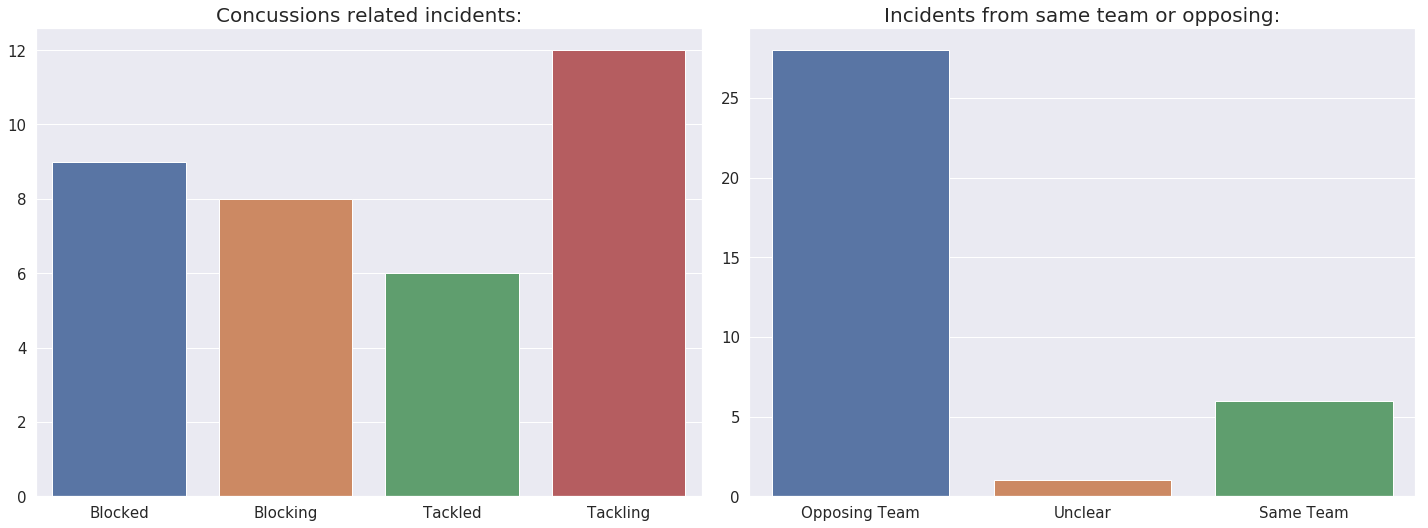

In [47]:
plt.figure(figsize=(20, 7.5))

plt.subplot(1, 2, 1)
_ = sns.countplot(video_review['Player_Activity_Derived'])
plt.title('Concussions related incidents:', fontsize=20)
plt.xlabel('')
plt.ylabel('')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.subplot(1, 2, 2)
_ = sns.countplot(video_review['Friendly_Fire'])
plt.title('Incidents from same team or opposing:', fontsize=20)
plt.xlabel('')
plt.ylabel('')
plt.xticks([0, 1, 2], ['Opposing Team', 'Unclear', 'Same Team'], fontsize=15)
plt.yticks(fontsize=15)

plt.tight_layout()
plt.show()

Most concussions occur while tackling a player from the opposed team. Maybe new rules could be applied on the players that are tackling in order to lower the incedents rate.

# <a id='video_footage_control'><b>6 Video Footage Control:</b></a>

In [48]:
video_footage_control = pd.read_csv('../input/video_footage-control.csv')
print(video_footage_control.shape)
video_footage_control.head()

(37, 10)


,season,Season_Type,Week,Home_team,Visit_Team,Qtr,PlayDescription,gamekey,playid,Preview Link
0,2017,Reg,2,Cincinnati Bengals,Houston Texans,1,"(14:14) S.Lechler punts 58 yards to CIN 13, Ce...",415,124,http://a.video.nfl.com//films/vodzilla/153511/...
1,2017,Reg,2,Cincinnati Bengals,Houston Texans,1,"(12:09) K.Huber punts 58 yards to HST 3, Cente...",415,299,http://a.video.nfl.com//films/vodzilla/153512/...
2,2017,Reg,2,Cincinnati Bengals,Houston Texans,1,"(10:19) S.Lechler punts 53 yards to CIN 37, Ce...",415,398,http://a.video.nfl.com//films/vodzilla/153513/...
3,2017,Reg,2,Cincinnati Bengals,Houston Texans,1,"(8:23) K.Huber punts 31 yards to HST 15, Cente...",415,526,http://a.video.nfl.com//films/vodzilla/153516/...
4,2017,Reg,2,Carolina Panthers,Buffalo Bills,1,"(7:56) C.Schmidt punts 57 yards to CAR 9, Cent...",417,436,http://a.video.nfl.com//films/vodzilla/153517/...


## <a id='video_footage_control_null'><b>6.1 Checking for Null values</b></a>

In [49]:
np.sum(video_footage_control.isnull())

season             0
Season_Type        0
Week               0
Home_team          0
Visit_Team         0
Qtr                0
PlayDescription    0
gamekey            0
playid             0
Preview Link       0
dtype: int64

## <a id='video_footage_control_types'><b>6.2 Checking column types</b></a>

In [50]:
video_footage_control.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 10 columns):
season             37 non-null int64
Season_Type        37 non-null object
Week               37 non-null int64
Home_team          37 non-null object
Visit_Team         37 non-null object
Qtr                37 non-null int64
PlayDescription    37 non-null object
gamekey            37 non-null int64
playid             37 non-null int64
Preview Link       37 non-null object
dtypes: int64(5), object(5)
memory usage: 3.0+ KB


## <a id='video_footage_control_types_plot'><b>6.3 Plotting video reviews by quarter</b></a>

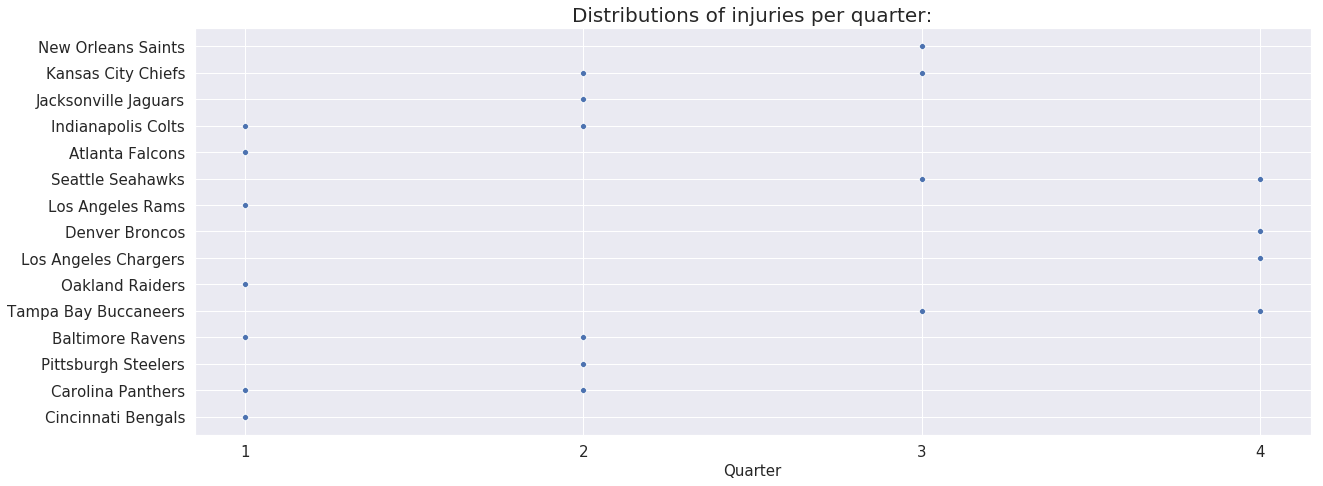

In [51]:
quarter_count = video_footage_control['Qtr'].value_counts()

plt.figure(figsize=(20, 7.5))

_ = sns.scatterplot(x='Qtr', y='Home_team', data=video_footage_control)
plt.title('Distributions of injuries per quarter:', fontsize=20)
plt.xlabel('Quarter', fontsize=15)
plt.ylabel('')
plt.xticks([1, 2, 3, 4], fontsize=15)
plt.yticks(fontsize=15)

plt.show()

In the 'video_footage_control', most reviews occur in the 1st quarter and most teams show a similar amount of reviews.

# <a id='play_information'><b>7 Play Information:</b></a>

In [52]:
play_information = pd.read_csv('../input/play_information.csv')
print(play_information.shape)
play_information.head()

(6681, 14)


,Season_Year,Season_Type,GameKey,Game_Date,Week,PlayID,Game_Clock,YardLine,Quarter,Play_Type,Poss_Team,Home_Team_Visit_Team,Score_Home_Visiting,PlayDescription
0,2016,Pre,2,08/13/2016,2,191,12:30,LA 47,1,Punt,LA,LA-DAL,0 - 7,"(12:30) J.Hekker punts 52 yards to DAL 1, Cent..."
1,2016,Pre,2,08/13/2016,2,1132,12:08,LA 29,2,Punt,LA,LA-DAL,7 - 21,"(12:08) J.Hekker punts 51 yards to DAL 20, Cen..."
2,2016,Pre,2,08/13/2016,2,1227,10:01,DAL 18,2,Punt,DAL,LA-DAL,7 - 21,"(10:01) C.Jones punts 40 yards to LA 42, Cente..."
3,2016,Pre,2,08/13/2016,2,1864,00:21,DAL 46,2,Punt,LA,LA-DAL,7 - 24,"(:21) J.Hekker punts 31 yards to DAL 15, Cente..."
4,2016,Pre,2,08/13/2016,2,2247,10:26,DAL 15,3,Punt,DAL,LA-DAL,14 - 24,"(10:26) M.Wile punts 40 yards to LA 45, Center..."


## <a id='play_information_null'><b>7.1 Checking for Null values</b></a>

In [53]:
np.sum(play_information.isnull())

Season_Year             0
Season_Type             0
GameKey                 0
Game_Date               0
Week                    0
PlayID                  0
Game_Clock              0
YardLine                0
Quarter                 0
Play_Type               0
Poss_Team               0
Home_Team_Visit_Team    0
Score_Home_Visiting     0
PlayDescription         0
dtype: int64

## <a id='play_information_types'><b>7.2 Checking column types</b></a>

In [54]:
play_information.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6681 entries, 0 to 6680
Data columns (total 14 columns):
Season_Year             6681 non-null int64
Season_Type             6681 non-null object
GameKey                 6681 non-null int64
Game_Date               6681 non-null object
Week                    6681 non-null int64
PlayID                  6681 non-null int64
Game_Clock              6681 non-null object
YardLine                6681 non-null object
Quarter                 6681 non-null int64
Play_Type               6681 non-null object
Poss_Team               6681 non-null object
Home_Team_Visit_Team    6681 non-null object
Score_Home_Visiting     6681 non-null object
PlayDescription         6681 non-null object
dtypes: int64(5), object(9)
memory usage: 730.8+ KB


In [55]:
category_columns = ['Season_Type']
play_information[category_columns] = play_information[category_columns].astype('category')
play_information.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6681 entries, 0 to 6680
Data columns (total 14 columns):
Season_Year             6681 non-null int64
Season_Type             6681 non-null category
GameKey                 6681 non-null int64
Game_Date               6681 non-null object
Week                    6681 non-null int64
PlayID                  6681 non-null int64
Game_Clock              6681 non-null object
YardLine                6681 non-null object
Quarter                 6681 non-null int64
Play_Type               6681 non-null object
Poss_Team               6681 non-null object
Home_Team_Visit_Team    6681 non-null object
Score_Home_Visiting     6681 non-null object
PlayDescription         6681 non-null object
dtypes: category(1), int64(5), object(8)
memory usage: 685.2+ KB


## <a id='play_information_types_plot'><b>7.3 Plotting total amount of plays per week</b></a>

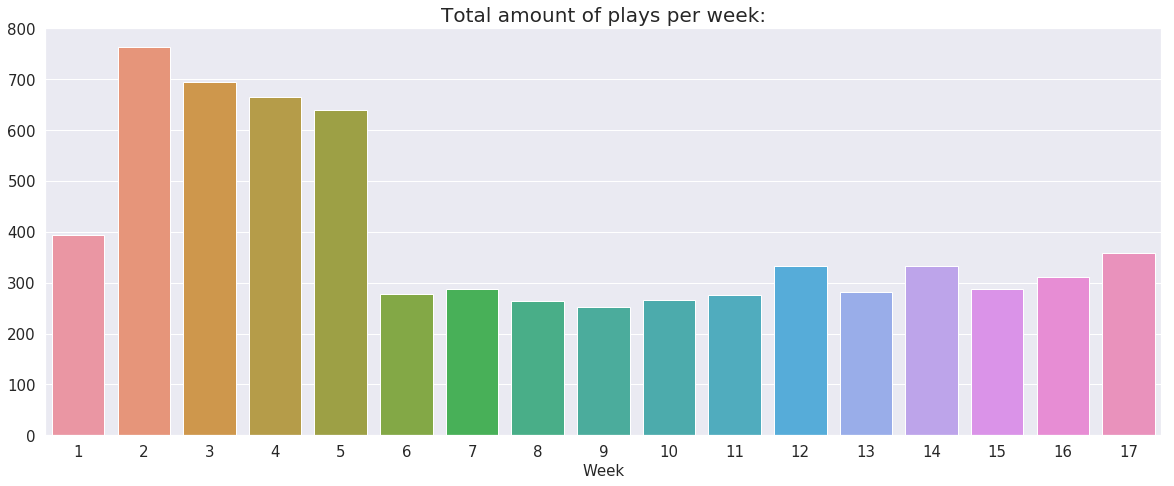

In [56]:
plt.figure(figsize=(20, 7.5))

_ = sns.countplot(play_information['Week'])
# _ = sns.swarmplot(x='Week', y='YardLine', data=play_information, hue='Poss_Team')
plt.title('Total amount of plays per week:', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Week', fontsize=15)
plt.ylabel('')

plt.show()

# <a id='play_player_role_data'><b>8 Play Player Role Data:</b></a>

In [57]:
play_player_role_data = pd.read_csv('../input/play_player_role_data.csv')
print(play_player_role_data.shape)
play_player_role_data.head()

(146573, 5)


,Season_Year,GameKey,PlayID,GSISID,Role
0,2017,414,188,33704,PDL2
1,2017,414,1107,33704,PDL2
2,2017,424,1113,33704,PDR3
3,2017,424,1454,33704,PLR2
4,2017,424,644,33704,PRG


## <a id='play_player_role_data_null'><b>8.1 Checking for Null values</b></a>

In [58]:
np.sum(play_player_role_data.isnull())

Season_Year    0
GameKey        0
PlayID         0
GSISID         0
Role           0
dtype: int64

## <a id='play_player_role_data_types'><b>8.2 Checking column types</b></a>

In [59]:
play_player_role_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146573 entries, 0 to 146572
Data columns (total 5 columns):
Season_Year    146573 non-null int64
GameKey        146573 non-null int64
PlayID         146573 non-null int64
GSISID         146573 non-null int64
Role           146573 non-null object
dtypes: int64(4), object(1)
memory usage: 5.6+ MB


## <a id='play_player_role_data_plot'><b>8.3 Plotting amount of players per role</b></a>

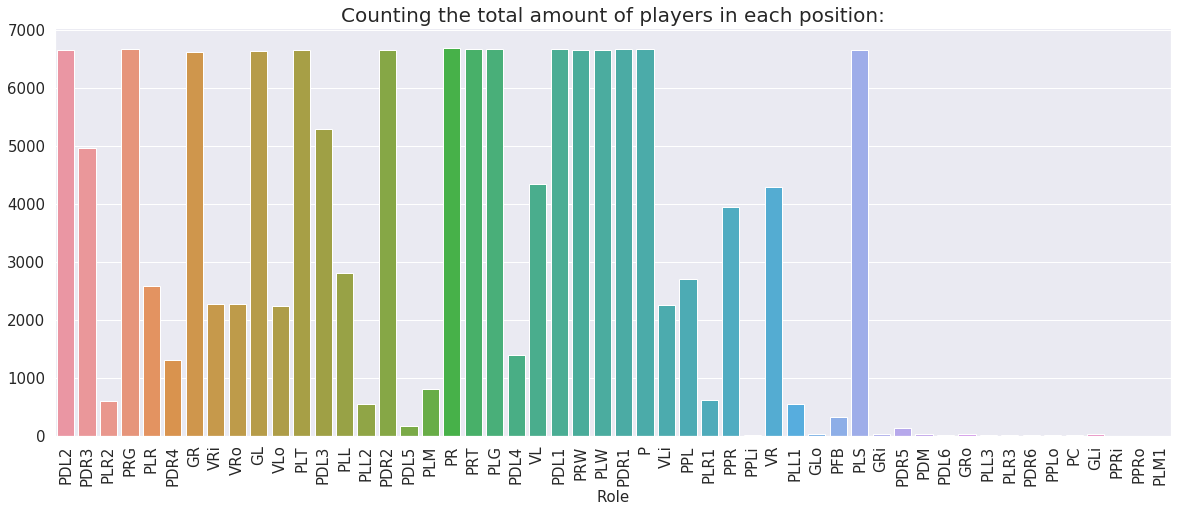

In [60]:
plt.figure(figsize=(20, 7.5))

_ = sns.countplot(play_player_role_data['Role'])
plt.title('Counting the total amount of players in each position:', fontsize=20)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Role', fontsize=15)
plt.ylabel('')

plt.show()

# <a id='player_punt_data'><b>9 Player Punt Data:</b></a>

In [61]:
player_punt_data = pd.read_csv('../input/player_punt_data.csv')
print(player_punt_data.shape)
player_punt_data.head()

(3259, 3)


,GSISID,Number,Position
0,32069,36,SS
1,30095,11,WR
2,31586,22,FS
3,29520,35,SS
4,30517,51,OLB


## <a id='player_punt_data_null'><b>9.1 Checking for Null values</b></a>

In [62]:
np.sum(player_punt_data.isnull())

GSISID      0
Number      0
Position    0
dtype: int64

## <a id='player_punt_data_types'><b>9.2 Checking column types</b></a>

In [63]:
player_punt_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3259 entries, 0 to 3258
Data columns (total 3 columns):
GSISID      3259 non-null int64
Number      3259 non-null object
Position    3259 non-null object
dtypes: int64(1), object(2)
memory usage: 76.5+ KB


## <a id='player_punt_data_plot'><b>9.3 Plotting each players position</b></a>

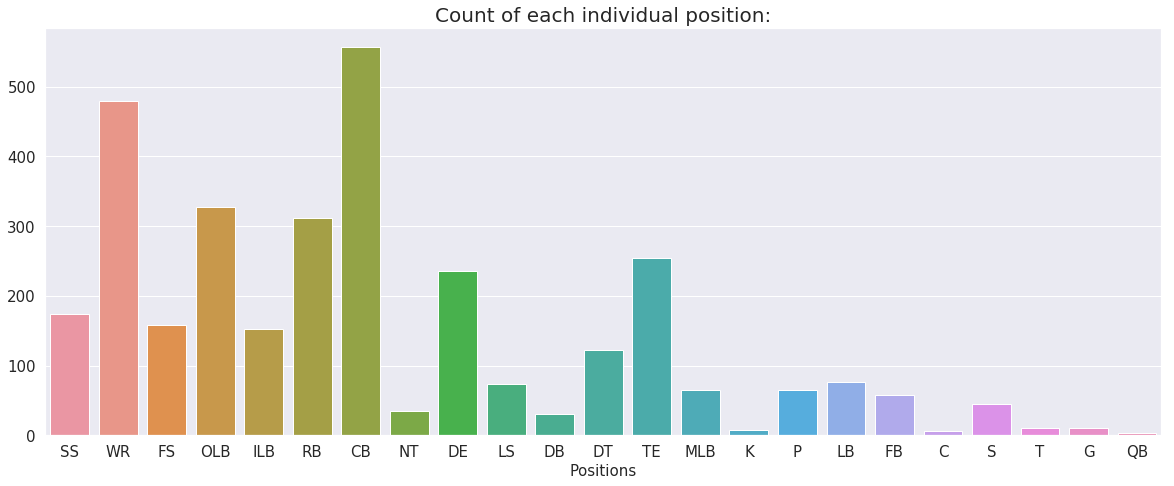

In [64]:
plt.figure(figsize=(20, 7.5))

_ = sns.countplot(player_punt_data['Position'])
plt.title('Count of each individual position:', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Positions', fontsize=15)
plt.ylabel('')

plt.show()

After importing, plotting and analyzing each of the datasets, I can see that some datasets can be combined in order to have a better picture of the overall injuries.

# <a id='player_data'><b>10 Player Data:</b></a>

In [65]:
player_data = pd.merge(play_player_role_data, player_punt_data)
player_data = pd.merge(player_data, video_review)
player_data.head()

,Season_Year,GameKey,PlayID,GSISID,Role,Number,Position,Player_Activity_Derived,Turnover_Related,Primary_Impact_Type,Primary_Partner_Activity_Derived,Friendly_Fire
0,2017,384,183,33813,PPR,35,S,Tackling,No,Helmet-to-body,Tackling,Yes
1,2017,384,183,33813,PPR,35d,S,Tackling,No,Helmet-to-body,Tackling,Yes
2,2017,448,2792,33838,PDR1,33,RB,Blocking,No,Helmet-to-body,Blocked,No
3,2016,266,2902,23564,PR,43,RB,Tackled,No,Helmet-to-body,Tackling,No
4,2016,274,3609,23742,P,9,P,Tackled,No,Helmet-to-helmet,Tackling,No


TypeError: 'Series' objects are mutable, thus they cannot be hashed

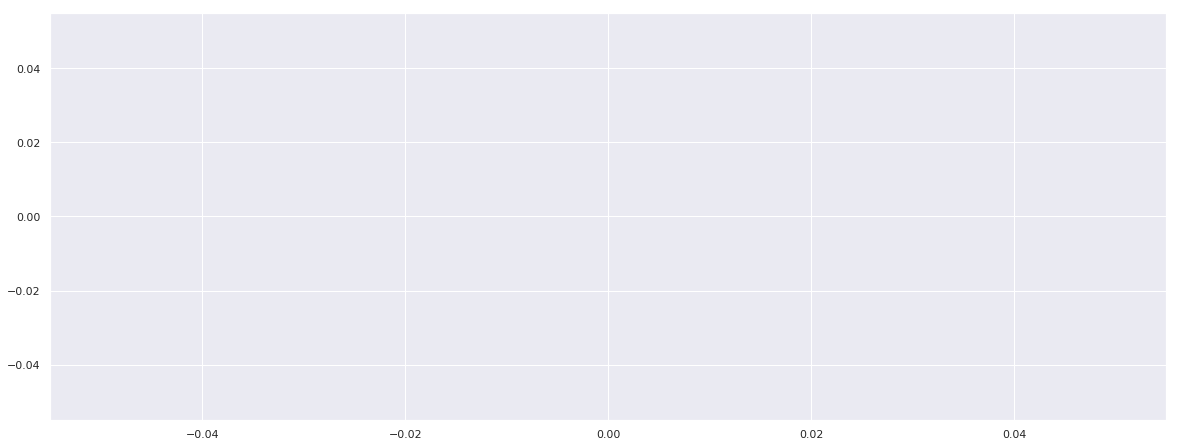

In [66]:
activity_derived_count = player_data['Player_Activity_Derived'].value_counts()
impact_type_count = player_data['Primary_Impact_Type'].value_counts()

plt.figure(figsize=(20, 7.5))

_ = sns.lineplot(player_data['Player_Activity_Derived'], player_data['Player_Activity_Derived'].value_counts)